In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [93]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [94]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

In [95]:
df.dropna(subset=df.columns, inplace=True)
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df['Date'] = pd.to_datetime(df.Date)
df['Season'] = df.Date.apply(date_to_season)
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Season'],
      dtype='object')

In [96]:
X = df.drop('Rainfall',axis=1)
y = df['Rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42)

In [97]:
numeric_fea = X_train.select_dtypes(include = ['int','float']).columns.tolist()
category_fea = X_train.select_dtypes(include = ['object']).columns.tolist()

numeric_scaled = Pipeline(steps=[('scaler',StandardScaler())])
category_scaled = Pipeline(steps=[('onehot',OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
  ('num',numeric_scaled, numeric_fea),
  ('cat',category_scaled, category_fea)
])

pipeline = Pipeline(steps=[
    ('preprocessor' , preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

cv = 5

In [98]:
param_distributions = {
    'model__max_depth': [10, 20, 30, None],
    'model__bootstrap': [True, False],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': [1, 2, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [10, 40, 100, 200, 300, 500],
    'model__warm_start': [True, False],
    'model__oob_score': [True, False]
}

random_search = RandomizedSearchCV(
  estimator = pipeline,
  param_distributions = param_distributions,
  scoring='r2',
  cv=cv,
  n_jobs=-1, 
  verbose=0
)

random_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.6.0 when using version 1.6.1. This might lead to breaking cod

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['MinTemp',
                                                                                'MaxTemp',
                                                                                'Evaporation',
                                                                                'Sunshine',
                                                                                'WindGustSpeed',
                                                                                'WindSpeed9am',
                                                                                'WindSpeed3pm',
                                                                                'Humidity9am',
                                                                                'Humidity3pm',
                                                                                'Pressure9am',
                                                                                'Pressure3pm',
                                                                                'Cloud9am',
                                                                                'Cloud3pm',
                                                                                'Temp9am',
                                                                                'Temp3pm']),
                                                                              ('cat',...
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [10, 20, 30, None],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [10, 40, 100,
                                                                200, 300, 500],
                                        'model__oob_score': [True, False],
                                        'model__warm_start': [True, False]},
                   scoring='r2')

In [99]:
print("Best parameters:", random_search.best_params_)
print("Best score (negative mean squared error):", random_search.best_score_)

test_score = random_search.best_estimator_.score(X_test, y_test)
print("Test R^2 score:", test_score)

Best parameters: {'model__warm_start': False, 'model__oob_score': False, 'model__n_estimators': 40, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 20, 'model__bootstrap': False}
Best score (negative mean squared error): 0.46300039398066273
Test R^2 score: 0.5628235683733565


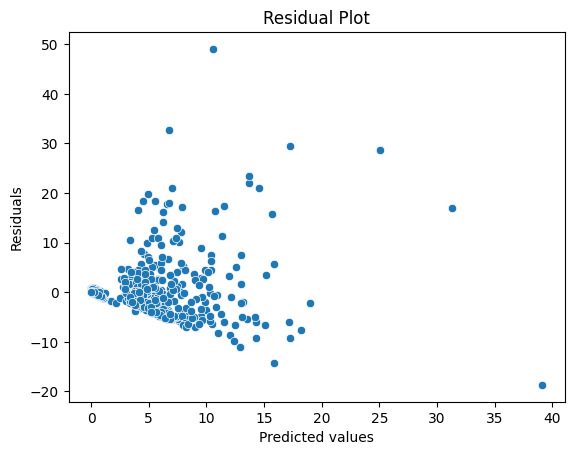

In [100]:
y_pred = grid_search.best_estimator_.predict(X_test)
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Importances

<Axes: >

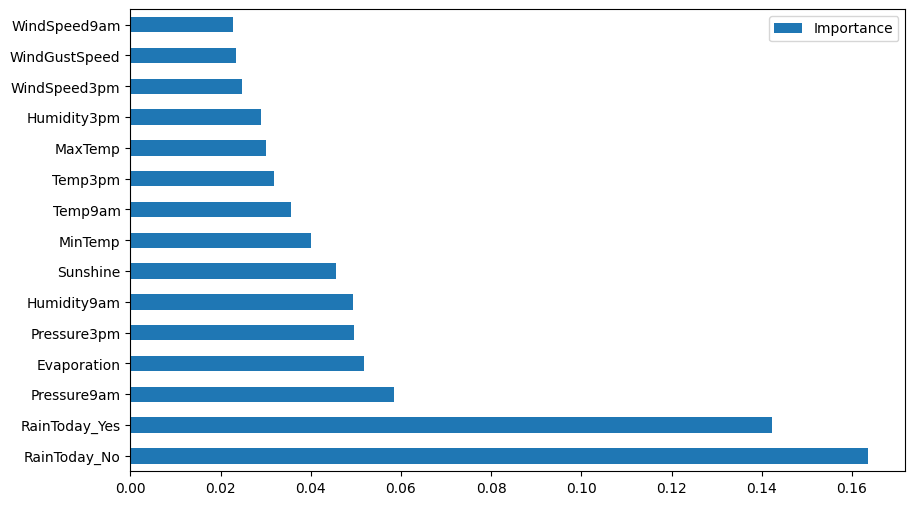

In [101]:
importances = grid_search.best_estimator_.named_steps['model'].feature_importances_

# Get feature names from the preprocessor
onehot_columns = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(category_fea)
columns = numeric_fea + list(onehot_columns)
importance_df = pd.DataFrame(importances, index=columns, columns=["Importance"]).sort_values(by='Importance', ascending=False)
importance_df.head(15).plot(kind='barh', figsize=(10, 6))